<a href="https://colab.research.google.com/github/marcosvandrade/colabororySistemasFuzzy/blob/master/Introdu%C3%A7%C3%A3o_aos_Sistemas_Fuzzy_(Marcos_Vasconcellos_de_Andrade).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo de Sistema Fuzzy** 

Dado que entendemos a idéia por trás dos Sistemas Fuzzy (ou seja, entendemos o básico de Lógica Fuzzy e Teoria dos Conjuntos Fuzzy), vamos realizar um experimento prático.

Então nosso problema consiste num caso simplificado de um problema clássico, **decidir o valor da gorgeta baseado na qualidade da comida consumida**.

Aqui segue uma descrição em termos das definições de sistemas fuzzy que vimos na aula:

# 1.   Variáveis de entrada (antecedentes):
## Qualidade da comida (nota)
*   Universo: [0,10]
*   Termos linguísticos: ruim, comestível, excelente

## Qualidade do serviço (nota)
*   Universo: [0,10]
*   Termos linguísticos: ruim, aceitável, muito bom

# 2.   Variáveis de saída (consequentes):
## Valor da gorjeta (percentual)
*   Universo: [0,25]
*   Termos linguísticos: pequena, média, alta

# 3.  Regras de decisão (regras sintáticas):
*   **SE** o serviço foi muito bom **OU** a comida estava excelente **ENTÃO** a gorjeta deve ser alta
*   **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média
*   **SE** o serviço foi ruim **E** a comida estava ruim **ENTÃO** a gorjeta deve ser pequena

Dada essa descrição, vamos criar o ambiente para montarmos nosso sisteminha fuzzy.




In [ ]:
# Instalando 2 bibliotecas que vamos precisar
!pip install networkx==2.3
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis que nós vamos utilizar nesse problema
# Note que o intervalo é aberto, então é por isso que utilizamos 
# 11, 11 e 26 em vez de 10, 10 e 25
# ajuda da função aqui: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# Cria automaticamente o mapeamento entre valores crisp e fuzzy
# usando uma função de pertinência padrão (triângulo)
# Vocês podem observar outras funções de pertinência na documentação
# aqui: https://pythonhosted.org/scikit-fuzzy/api/api.html
# Em geral funções que terminem em 'mf' são funções de pertinência (membership functions)
comida.automf(names=['ruim', 'comestível', 'excelente'])


# Cria as funções de pertinência usando tipos variados de funções
# trimf = triangular, gaussmf = gaussiana e trapmf = trapezoidal
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['muito bom'] = fuzz.gaussmf(servico.universe, 10,3)

gorjeta['pequena'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

# **Visualização do Sistema montado até agora** 

Lembrando que, membership = grau de pertinência

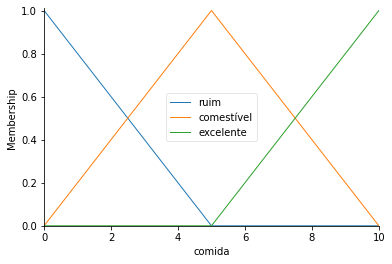

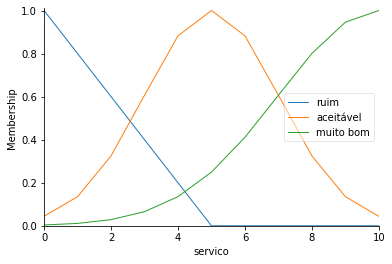

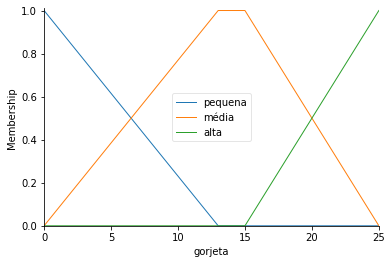

In [ ]:
comida.view()
servico.view()
gorjeta.view()

# **Criando o conjunto de regras** 

In [ ]:
# A classe Rule é utilizada para modelar nossas regras
# Documentação da classe aqui: https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#rule
# É necessário conhecer e entender os operadores lógicos do Python para combinar os statements
rule1 = ctrl.Rule(servico['muito bom'] | comida['excelente'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['ruim'], gorjeta['pequena'])

# **Criando o nosso sistema de inferência e realizando uma simulação** 

In [ ]:
# Aqui incluímos todas as nossas regras no sistema de controle
# podemos passar qualquer iterável que contenha nossas regras,
# não precisa ser exatamente desse jeito
# Mais infos sobre essa classe aqui: https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#controlsystem
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


#Aqui iniciamos o simulador e damos nota às duas variáveis de entrada
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com as notas para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

# Computando o resultado
gorjeta_simulador.compute()
print(str(round(gorjeta_simulador.output['gorjeta'])) + '%')


19.0%
